In [23]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [9]:
data=pd.read_csv('minoo/main_data')
data.drop('Unnamed: 0' , axis=1 , inplace=True)
data

,Age,NumOfProducts,HasCrCard,IsActiveMember,Exited,male
0,42,1,1,1,1,0
1,41,1,0,1,0,0
2,42,3,1,0,1,0
3,39,2,0,0,0,0
4,43,1,1,1,0,0
...,...,...,...,...,...,...
9995,39,2,1,0,0,1
9996,35,1,1,1,0,1
9997,36,1,0,1,1,0
9998,42,2,1,0,1,1


In [13]:
X=data.drop('Exited' ,axis=1).values
Y=data['Exited'].values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [44]:
lg= LogisticRegression(random_state=0)
lg.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [46]:
kn=KNeighborsClassifier()
kn.fit(X_train,y_train)

KNeighborsClassifier()

In [28]:
RF=RandomForestClassifier()
RF.fit(X_train,y_train)

RandomForestClassifier()

In [29]:
nb=GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [47]:
xg=XGBClassifier()
xg.fit(X_train,y_train)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:59:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [48]:
ca=CatBoostClassifier()
ca.fit(X_train,y_train)

Learning rate set to 0.023648
0:	learn: 0.6751115	total: 214ms	remaining: 3m 33s
1:	learn: 0.6557939	total: 224ms	remaining: 1m 51s
2:	learn: 0.6381804	total: 233ms	remaining: 1m 17s
3:	learn: 0.6221292	total: 240ms	remaining: 59.7s
4:	learn: 0.6061383	total: 245ms	remaining: 48.8s
5:	learn: 0.5907702	total: 251ms	remaining: 41.6s
6:	learn: 0.5765098	total: 256ms	remaining: 36.3s
7:	learn: 0.5640068	total: 261ms	remaining: 32.4s
8:	learn: 0.5532160	total: 266ms	remaining: 29.3s
9:	learn: 0.5424469	total: 271ms	remaining: 26.8s
10:	learn: 0.5331636	total: 277ms	remaining: 24.9s
11:	learn: 0.5232355	total: 282ms	remaining: 23.2s
12:	learn: 0.5140309	total: 287ms	remaining: 21.8s
13:	learn: 0.5050696	total: 292ms	remaining: 20.6s
14:	learn: 0.4970457	total: 298ms	remaining: 19.5s
15:	learn: 0.4885503	total: 303ms	remaining: 18.6s
16:	learn: 0.4808755	total: 309ms	remaining: 17.8s
17:	learn: 0.4751928	total: 314ms	remaining: 17.1s
18:	learn: 0.4691704	total: 319ms	remaining: 16.5s
19:	lear

In [49]:
rf_predict=RF.predict(X_test)
nb_predict=nb.predict(X_test)
lg_predict=lg.predict(X_test)
kn_predict=kn.predict(X_test)
xg_predict=xg.predict(X_test)
ca_predict=ca.predict(X_test)

In [50]:
from sklearn.metrics import roc_curve,roc_auc_score

In [51]:
rf_auc=roc_auc_score(y_test,rf_predict)
nb_auc=roc_auc_score(y_test,nb_predict)
lg_auc=roc_auc_score(y_test,lg_predict)
kn_auc=roc_auc_score(y_test,kn_predict)
xg_auc=roc_auc_score(y_test,xg_predict)
ca_auc=roc_auc_score(y_test,ca_predict)

In [55]:
rf_fpr,rf_tpr,_ =roc_curve(y_test,rf_predict)
nb_fpr,nb_tpr,_ =roc_curve(y_test,nb_predict)
lg_fpr,lg_tpr,_ =roc_curve(y_test,lg_predict)
kn_fpr,kn_tpr,_ =roc_curve(y_test,kn_predict)
xg_fpr,xg_tpr,_ =roc_curve(y_test,xg_predict)
ca_fpr,ca_tpr,_ =roc_curve(y_test,ca_predict)

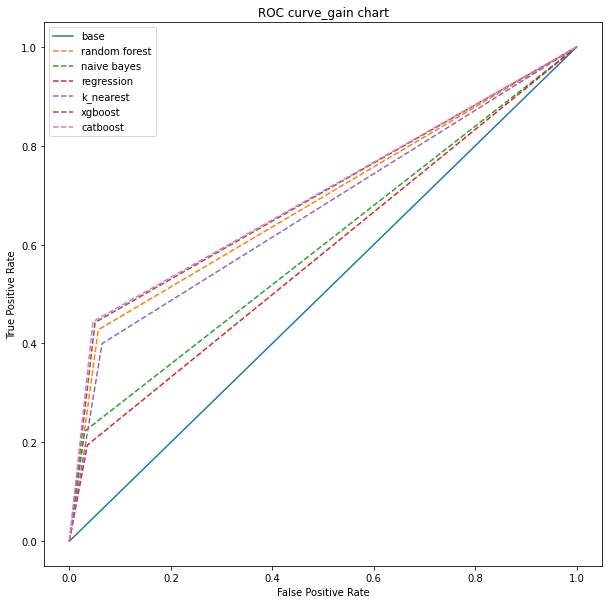

In [59]:
plt.subplots(1, figsize=(10,10))
r=[0,0.5,1]
p=r
plt.plot(r,p , linestyle='-', label='base')
plt.plot(rf_fpr,rf_tpr , linestyle='--' , label='random forest')
plt.plot(nb_fpr,nb_tpr , linestyle='--' , label='naive bayes')
plt.plot(lg_fpr,lg_tpr , linestyle='--' , label='regression')
plt.plot(kn_fpr,kn_tpr , linestyle='--' , label='k_nearest')
plt.plot(xg_fpr,xg_tpr , linestyle='--' , label='xgboost')
plt.plot(ca_fpr,ca_tpr , linestyle='--' , label='catboost')



plt.title('ROC curve_gain chart')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()